# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

2025-08-07 10:07:56.442212: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

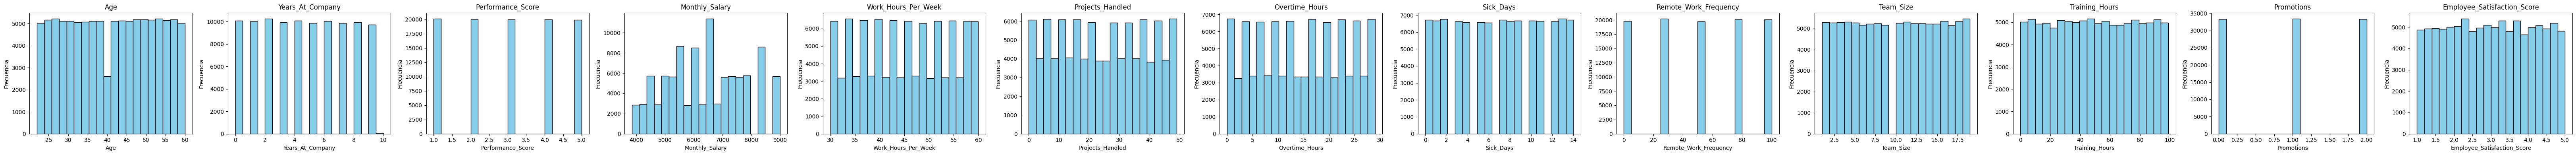

In [3]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [7]:
# Selección de características (X) y variable objetivo (y)
X = numeric_columns.drop('Employee_Satisfaction_Score', axis=1)
y = numeric_columns['Employee_Satisfaction_Score']

# Redondeamos la variable de satisfacción y la convertimos en 5 categorías (de 0 a 4)
y = y.apply(lambda x: round(x) - 1)

# Escalamos las características numéricas
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

# Dividimos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standar, y, test_size=0.33, random_state=42)

# Convertimos las etiquetas a one-hot encoding (clasificación multiclase)
y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test = tf.keras.utils.to_categorical(y_test, 5)


- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc). 

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

MLP_Basico = Sequential(name='MLP_Basico')
MLP_Basico.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
MLP_Basico.add(Dense(16, activation='relu'))
MLP_Basico.add(Dense(5, activation='softmax'))  # 5 clases

MLP_Basico.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
MLP_Basico.summary()


/home/erubanel/aprendizaj-profundo/env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-07 12:13:05.178504: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "MLP_Basico"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029 (4.02 KB)

 Trainable params: 1,029 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

MLP_Profundo = Sequential(name='MLP_Profundo')
MLP_Profundo.add(Dense(128, activation='tanh', input_shape=(X_train.shape[1],)))
MLP_Profundo.add(Dense(64, activation='tanh'))
MLP_Profundo.add(Dense(32, activation='tanh'))
MLP_Profundo.add(Dense(16, activation='tanh'))
MLP_Profundo.add(Dense(5, activation='softmax'))

MLP_Profundo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
MLP_Profundo.summary()


Model: "MLP_Profundo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,613 (49.27 KB)

 Trainable params: 12,613 (49.27 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

MLP_Regularizado = Sequential(name='MLP_Regularizado')
MLP_Regularizado.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
MLP_Regularizado.add(Dropout(0.3))
MLP_Regularizado.add(Dense(64, activation='relu'))
MLP_Regularizado.add(Dropout(0.3))
MLP_Regularizado.add(Dense(32, activation='relu'))
MLP_Regularizado.add(Dense(5, activation='softmax'))

MLP_Regularizado.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
MLP_Regularizado.summary()


Model: "MLP_Regularizado"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,237 (28.27 KB)

 Trainable params: 7,237 (28.27 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history1 = MLP_Basico.fit(X_train, y_onehot_train, epochs=20, batch_size=32, validation_split=0.2)
history2 = MLP_Profundo.fit(X_train, y_onehot_train, epochs=20, batch_size=32, validation_split=0.2)
history3 = MLP_Regularizado.fit(X_train, y_onehot_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2491 - loss: 1.5670 - val_accuracy: 0.2516 - val_loss: 1.5581
Epoch 2/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2583 - loss: 1.5556 - val_accuracy: 0.2560 - val_loss: 1.5578
Epoch 3/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2574 - loss: 1.5547 - val_accuracy: 0.2537 - val_loss: 1.5578
Epoch 4/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2601 - loss: 1.5540 - val_accuracy: 0.2534 - val_loss: 1.5580
Epoch 5/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2616 - loss: 1.5534 - val_accuracy: 0.2529 - val_loss: 1.5583
Epoch 6/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2634 - loss: 1.5528 - val_accuracy: 0.2537 - val_loss: 1.5587
Epoch 7/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2657 - loss: 1.5522 - val_accuracy: 0.2503 - val_loss: 1.5595
Epoch 8/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2672 - loss: 1.5513 - 

In [12]:
print("Evaluación MLP_Basico:", MLP_Basico.evaluate(X_test, y_onehot_test))
print("Evaluación MLP_Profundo:", MLP_Profundo.evaluate(X_test, y_onehot_test))
print("Evaluación MLP_Regularizado:", MLP_Regularizado.evaluate(X_test, y_onehot_test))


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2526 - loss: 1.5623
Evaluación MLP_Basico: [1.5623396635055542, 0.25257575511932373]
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2533 - loss: 1.5719
Evaluación MLP_Profundo: [1.5719263553619385, 0.25333333015441895]
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2526 - loss: 1.5580
Evaluación MLP_Regularizado: [1.5579819679260254, 0.252606064081192]


- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [13]:
MLP_Basico.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_basico = MLP_Basico.fit(
    X_train, y_onehot_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2744 - loss: 1.5472 - val_accuracy: 0.2528 - val_loss: 1.5641
Epoch 2/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2755 - loss: 1.5470 - val_accuracy: 0.2521 - val_loss: 1.5642
Epoch 3/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2769 - loss: 1.5466 - val_accuracy: 0.2500 - val_loss: 1.5648
Epoch 4/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2764 - loss: 1.5464 - val_accuracy: 0.2559 - val_loss: 1.5654
Epoch 5/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2769 - loss: 1.5462 - val_accuracy: 0.2515 - val_loss: 1.5659
Epoch 6/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2754 - loss: 1.5460 - val_accuracy: 0.2508 - val_loss: 1.5642
Epoch 7/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2778 - loss: 1.5461 - val_accuracy: 0.2512 - val_loss: 1.5651
Epoch 8/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2773 - loss: 1.5455 - 

In [14]:
MLP_Profundo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_profundo = MLP_Profundo.fit(
    X_train, y_onehot_train,
    epochs=30,              # Más épocas por tener más capas
    batch_size=64,          # Lotes más grandes
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2984 - loss: 1.5318 - val_accuracy: 0.2479 - val_loss: 1.5771
Epoch 2/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3003 - loss: 1.5291 - val_accuracy: 0.2519 - val_loss: 1.5803
Epoch 3/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3025 - loss: 1.5273 - val_accuracy: 0.2467 - val_loss: 1.5805
Epoch 4/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3046 - loss: 1.5251 - val_accuracy: 0.2434 - val_loss: 1.5821
Epoch 5/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3073 - loss: 1.5223 - val_accuracy: 0.2478 - val_loss: 1.5854
Epoch 6/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3090 - loss: 1.5203 - val_accuracy: 0.2482 - val_loss: 1.5876
Epoch 7/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3128 - loss: 1.5180 - val_accuracy: 0.2505 - val_loss: 1.5898
Epoch 8/30
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3140 - loss: 1.5155 - val_accuracy: 0.

MLP_Regularizado.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_regularizado = MLP_Regularizado.fit(
    X_train, y_onehot_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.